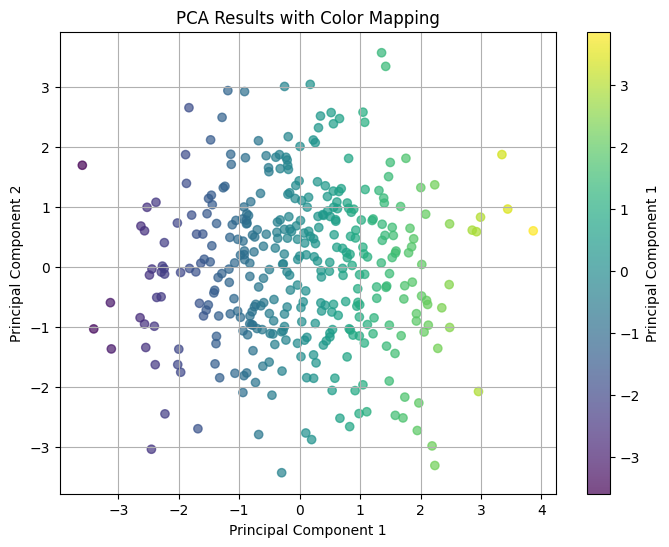

Explained variance by each component: [0.04288801 0.04048469]


In [7]:
#PCA 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('new_data2.csv')

# Drop the 'date' column as it's not required
data = data.drop(['date(dd/mm/yy)'], axis=1)

np.random.seed(42)
X_for_analysis = np.random.rand(366, 40)  

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_for_analysis)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_standardized)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['Principal Component 1'], 
    pca_df['Principal Component 2'], 
    c=pca_df['Principal Component 1'],  # Use the first component for coloring
    cmap='viridis',  # Color map
    alpha=0.7
)
plt.colorbar(scatter, label='Principal Component 1')
plt.title('PCA Results with Color Mapping')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

Explained variance by each component: [0.27842312 0.17232339]
PCA Loadings:
                                 PC1           PC2
VSKP                   2.739643e-02 -9.707022e-02
Temperature_1         -8.112129e-01 -3.984430e-01
Wind_Speed_1          -2.148229e-01 -2.555208e-03
weather_code_1        -4.571476e-01  5.897867e-01
Distance_travelled_1   1.855063e-16 -2.918825e-16
YLM                   -1.309878e-01 -8.157873e-02
Temperature_2         -8.720346e-01 -3.447566e-01
Wind_Speed_2          -4.128579e-01  3.632934e-01
weather_code_2        -4.731140e-01  5.537351e-01
Distance_travelled_2  -0.000000e+00  1.781510e-20
ANV                   -1.934077e-01 -1.727385e-01
Temperature_3         -7.931775e-01 -4.197089e-01
Wind_Speed_3          -1.240157e-01  1.278152e-01
weather_code_3        -5.652449e-01  5.055159e-01
Distance_travelled_3   4.217924e-29 -0.000000e+00
SLO                   -2.316304e-01 -4.471525e-02
Temperature_4         -8.395392e-01 -4.510610e-01
Wind_Speed_4          -

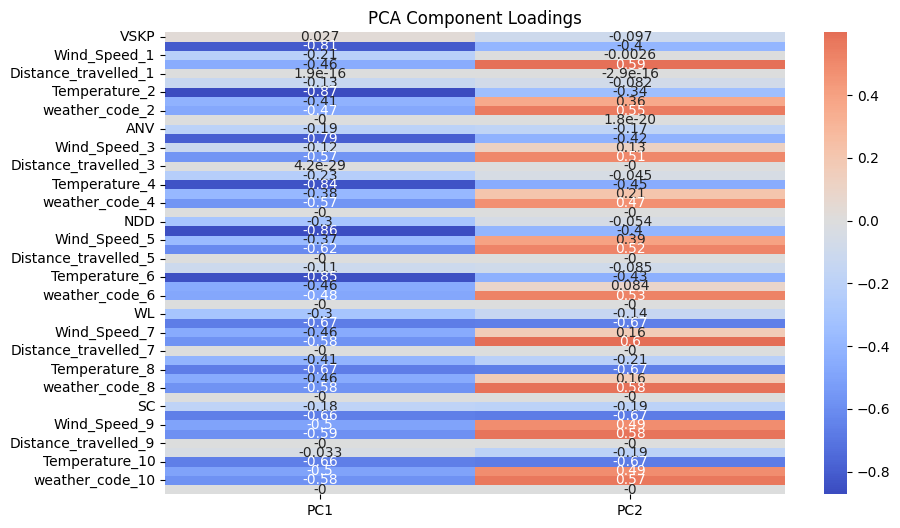

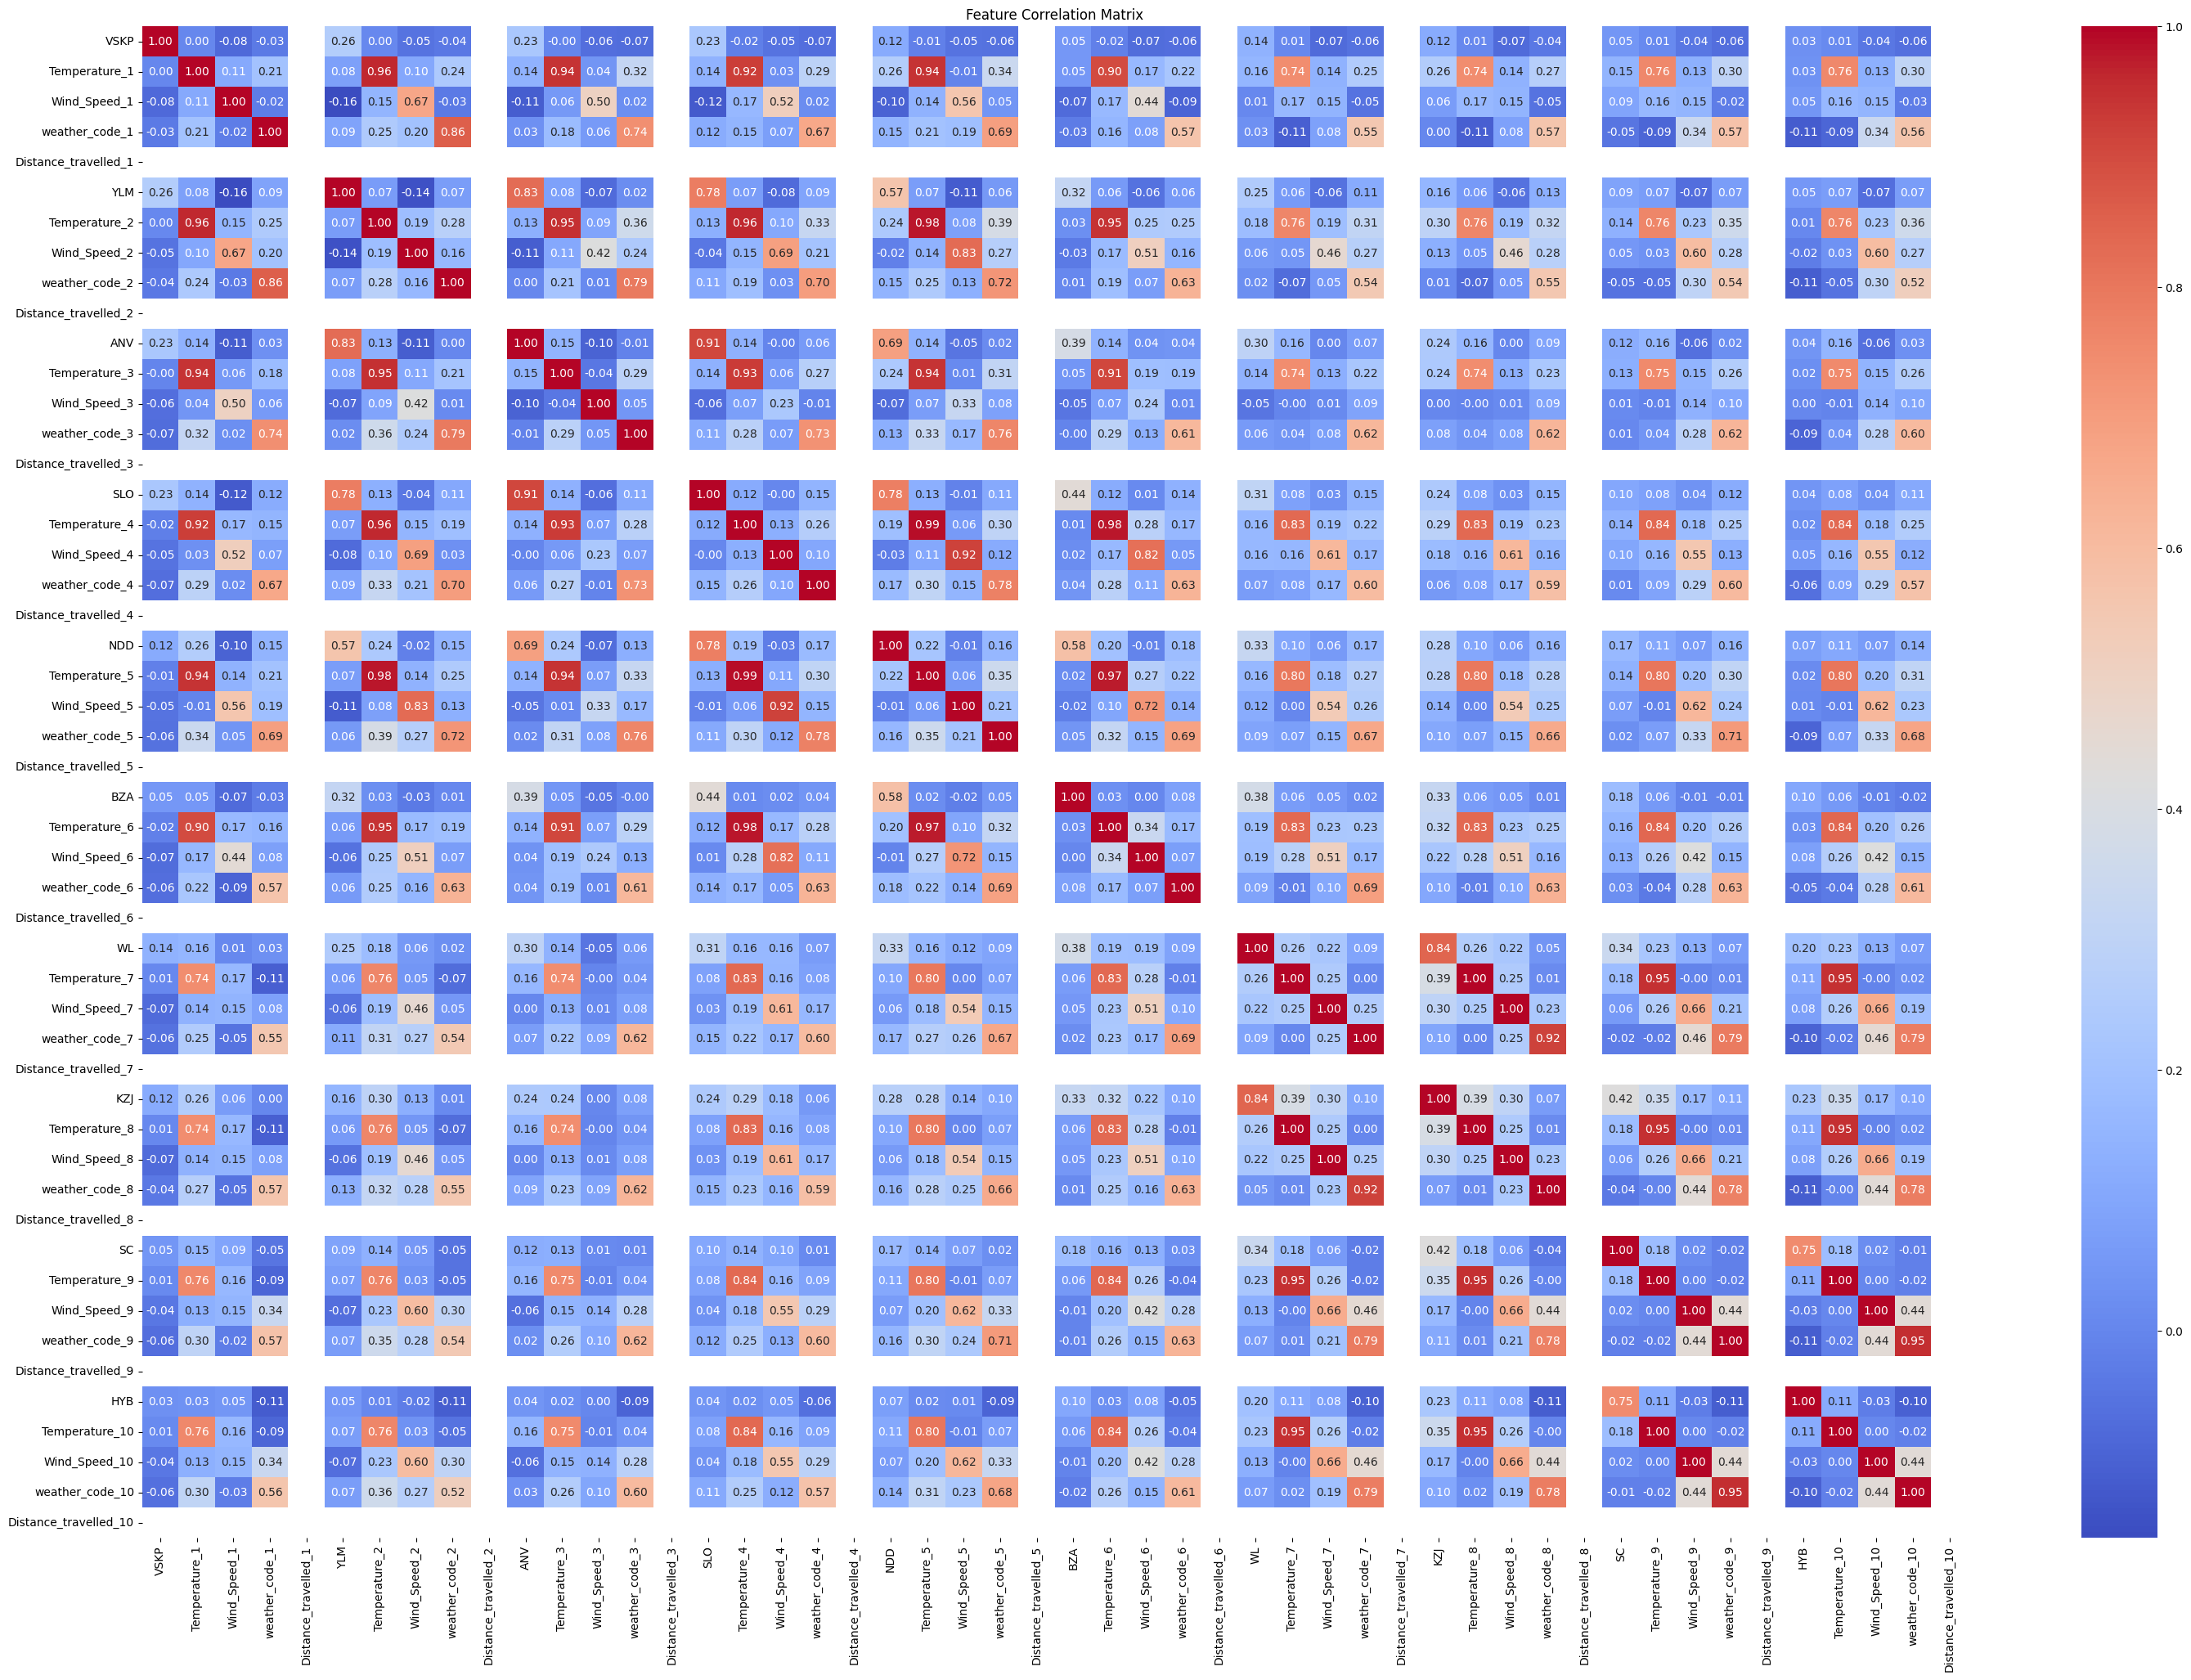

Important Features:
                       PC1       PC2
Temperature_1   -0.811213 -0.398443
weather_code_1  -0.457148  0.589787
Temperature_2   -0.872035 -0.344757
weather_code_2  -0.473114  0.553735
Temperature_3   -0.793177 -0.419709
weather_code_3  -0.565245  0.505516
Temperature_4   -0.839539 -0.451061
weather_code_4  -0.565251  0.473079
Temperature_5   -0.857892 -0.401216
weather_code_5  -0.618226  0.518695
Temperature_6   -0.852386 -0.432073
weather_code_6  -0.477437  0.525948
Temperature_7   -0.669047 -0.665002
weather_code_7  -0.576250  0.599881
Temperature_8   -0.669047 -0.665002
weather_code_8  -0.575918  0.582952
Temperature_9   -0.664173 -0.673611
weather_code_9  -0.588247  0.581622
Temperature_10  -0.664173 -0.673611
weather_code_10 -0.581603  0.567441
High Correlation Pairs:
                        VSKP  Temperature_1  Wind_Speed_1  weather_code_1  \
VSKP                    1.0            NaN           NaN             NaN   
Temperature_1           NaN       1.000000    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('new_data2.csv')

# Drop the 'date' column as it's not required
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Scale the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# PCA Component Loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data.columns)

print("PCA Loadings:\n", loadings_df)

# Visualizing loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()

# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(36, 24))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Identify important features based on loadings
# Set a threshold (e.g., 0.5) for considering a feature important
threshold = 0.5
important_features = loadings_df[(abs(loadings_df['PC1']) > threshold) | (abs(loadings_df['PC2']) > threshold)]

print("Important Features:\n", important_features)

# Optionally, you can decide which features to drop based on correlation (e.g., high correlations)
# Identify pairs of features with high correlation
high_correlation_pairs = correlation_matrix[abs(correlation_matrix) > 0.8]
print("High Correlation Pairs:\n", high_correlation_pairs)

# You can use the important features and correlation analysis to decide which features to eliminate
